In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Análise Exploratória dos Dados

In [2]:
data_location = "../Projeto-Integrador-III--Fraude-Cartao-Credito/Data/card_transdata.csv"
data = pd.read_csv(data_location, sep = ",")

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
print('\nConjunto de dados, linhas e colunas\n')
print('The shape of the data set is:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Checking for missing values: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')

print('\nCheck balanceamento da target fraud\n')
print(data['fraud'].value_counts())
print('\n---------------------------------------------\n')


Conjunto de dados, linhas e colunas

The shape of the data set is: (1000000, 8)

---------------------------------------------


Check valores nulos

Checking for missing values: 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

---------------------------------------------


Estatísticas

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985  

Observando a distribuição dos dados

In [5]:
#sns.pairplot(data, 
#             hue = 'fraud'
#            );

# Balanceamento da variável target

In [6]:
data['fraud'].value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

Verificamos que nesse conjunto apenas 8% dos dados são de cartões fraudados

Observando a distribuição dos dados

Para resolver o problema do balanceamento vamos primeiramente criar dois datasets, um para os dados com frades e outro com dados sem fraude

In [7]:
no_fraud=data[data.fraud == 0]
fraud=data[data.fraud == 1]

Pegando uma amostra de 5000 para cada cada dataset, com fraude e sem fraude

In [10]:
dt_no_fraude_sample=no_fraud.sample(n=5000)
dt_fraude_sample=fraud.sample(n=5000)

Criação de um novo dataset com as amostras criadas anteriormente

In [11]:
data_fraud=pd.concat([dt_no_fraude_sample,dt_fraude_sample],axis=0)

In [12]:
data_fraud['fraud'].value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: fraud, dtype: float64

In [13]:
data_fraud.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.021910,-0.083728,0.174320,-0.106320,-0.030136,0.069126,0.221974
distance_from_last_transaction,-0.021910,1.000000,-0.044499,-0.012492,-0.045420,-0.031970,0.022678,0.130282
ratio_to_median_purchase_price,-0.083728,-0.044499,1.000000,-0.049309,0.029302,-0.103094,0.140356,0.510013
repeat_retailer,0.174320,-0.012492,-0.049309,1.000000,-0.011454,0.002161,0.076219,-0.013143
used_chip,-0.106320,-0.045420,0.029302,-0.011454,1.000000,0.000454,-0.026611,-0.112615
used_pin_number,-0.030136,-0.031970,-0.103094,0.002161,0.000454,1.000000,-0.074607,-0.237310
online_order,0.069126,0.022678,0.140356,0.076219,-0.026611,-0.074607,1.000000,0.384745
fraud,0.221974,0.130282,0.510013,-0.013143,-0.112615,-0.237310,0.384745,1.000000


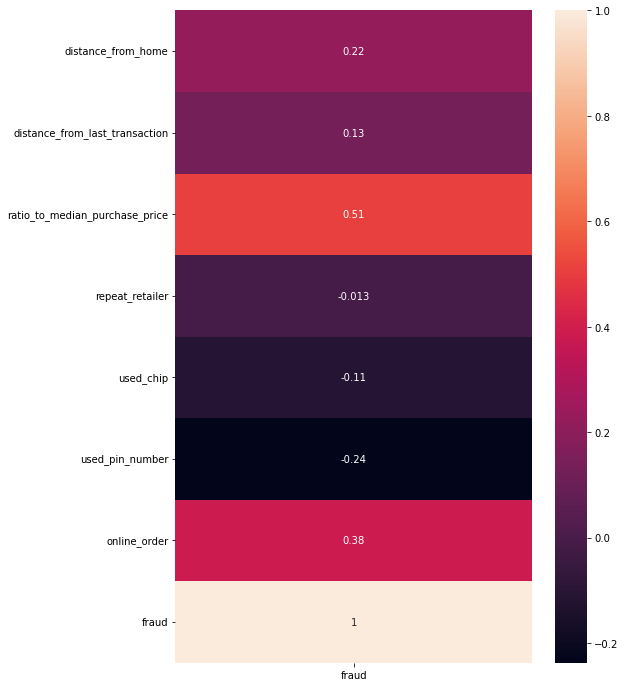

In [14]:
plt.figure(figsize = (8,12))
sns.heatmap(data_fraud.corr()[['fraud']], 
            annot = True
           );

# Regressão Logística

Instanciando um objeto da classe LogisticRegression

In [97]:
lr = LogisticRegression()

Definindo a matriz de features e a variável target

In [98]:
X = data_fraud.drop(columns=['fraud'],axis=1)
y = data_fraud["fraud"]

Split do dataset de treino e de teste

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

Verificando se as proporções da variável target no treino e teste são correspondentes

In [100]:
y_train.mean(), y_test.mean()

(0.5, 0.5)

Check dos dataset de treino e teste

In [101]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (7500, 7)
y_train: (7500,)
X_test: (2500, 7)
y_test: (2500,)


Padronização das features do modelosd e treino e de teste

In [102]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Ajuste do modelo

In [103]:
lr.fit(X_train_std, y_train)

LogisticRegression()

Visualização dos coeficientes

In [104]:
print(lr.coef_)
print(lr.intercept_)

[[ 2.81528201  1.62130559  5.73782239 -0.50465977 -0.62921161 -3.37362923
   2.1340336 ]]
[0.06562332]


Previsão da acurácia com o modelo treinado

In [105]:
accuracy_score(y_train, lr.predict(X_train_std))

0.9416

Matriz de confusão do modelo de treino

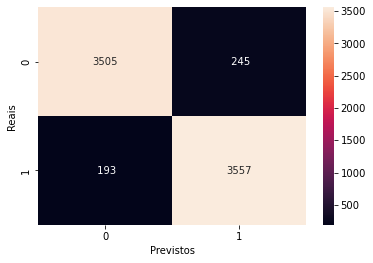

In [106]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, porém dos 3750 casos positivos, e que 3588 (95%) estão sendo detectados. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Previsão da acurácia com o modelo de teste

In [108]:
test_pred=accuracy_score(y_test, lr.predict(X_test_std))
print(test_pred)

0.9416


Matriz de confusão do modelo de teste

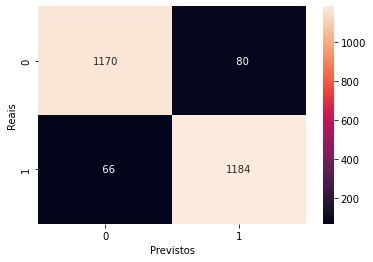

In [109]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%. No teste também notamos que dos 1250 casos positivos, 1188 (95%) são detectadas como fruades verdadeiras. 

In [110]:
report_class = classification_report(y_test, test_pred)

TypeError: Singleton array 0.9416 cannot be considered a valid collection.

In [ ]:
print("Classification Report:\n----------------------\n", report_class)

# Regressão Logistica 2

In [67]:
model_lr= LogisticRegression(max_iter=1000)

In [76]:
X2 = data_fraud.drop(columns=['fraud'],axis=1)
y2 = data_fraud["fraud"]

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, stratify=y, random_state=12)

In [78]:
scale=MinMaxScaler().fit(X_train2)
train_features_scaled=scale.transform(X_train2)
test_features_scaled=scale.transform(X_test2)

In [79]:
param_lr={
    "solver": ['newton-cg','lbfgs','liblinear'],
    "C":[100, 10, 1.0, 0.1, 0.01],
    "penalty":['l2']
}

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
random_lr=RandomizedSearchCV(estimator=model_lr, param_distributions=param_lr, n_iter = 15 , scoring='accuracy', cv = 10, verbose=2, n_jobs=-1,random_state=43)

In [83]:
random_lr.fit(train_features_scaled,y_train2)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=43, scoring='accuracy', verbose=2)

In [84]:
model_lr=random_lr.best_estimator_

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
crossval = cross_val_score(model_lr,train_features_scaled,y_train2,cv=5,scoring='accuracy')

In [88]:
scores = np.mean(crossval)

In [91]:
test_pred=model_lr.predict(test_features_scaled)
test_recall = recall_score(y_test2, test_pred, pos_label=1)
fpr,tpr,thresholds = roc_curve(y_test2, test_pred, pos_label=1)
test_auc = auc(fpr,tpr)

In [92]:
print('Train acc:',round(scores*100,2),'%')
print('Test acc:',round(accuracy_score(y_test2,test_pred)*100,2),'%')
print('Best solver:',random_lr.best_estimator_.get_params()['solver'])
print('Best C:',random_lr.best_estimator_.get_params()['C'])
print('Best penalty:',random_lr.best_estimator_.get_params()['penalty'])

Train acc: 94.09 %
Test acc: 94.4 %
Best solver: newton-cg
Best C: 10
Best penalty: l2


In [94]:
from sklearn.metrics import classification_report

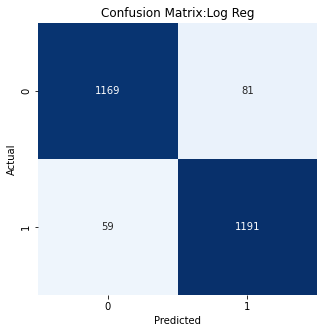

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1250
         1.0       0.94      0.95      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



In [95]:
test_pred=model_lr.predict(test_features_scaled)
cm = confusion_matrix(y_test2, test_pred)
clr = classification_report(y_test2, test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:Log Reg")
plt.show()
print("Classification Report:\n----------------------\n", clr)